# K-means, Hierarchical and DBSCAN Algorithms

## Data preprocessing

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df1 = pd.read_excel('EastWestAirlines.xlsx', skiprows=8)
df1

# Got basic detailing of features

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
1,ID#,NUMBER,NaN,Telcom,Unique ID
2,Balance,NUMBER,8,Raw,Number of miles eligible for award travel
3,Qual_miles,NUMBER,8,Raw,Number of miles counted as qualifying for Topf...
4,cc1_miles,CHAR,1,Raw,Number of miles earned with freq. flyer credit...
5,cc2_miles,CHAR,1,Raw,Number of miles earned with Rewards credit car...
6,cc3_miles,CHAR,1,Raw,Number of miles earned with Small Business cre...
7,note: miles bins:,NaN,NaN,NaN,"1 = under 5,000"
8,NaN,NaN,NaN,NaN,"2 = 5,000 - 10,000"
9,NaN,NaN,NaN,NaN,"3 = 10,001 - 25,000"


In [54]:
# Reading XSLX file
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [55]:
df.info()
# no null values

# df.duplicated().sum()
# no duplicate values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [56]:
# summarizing data
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [57]:
# dropping column ID(Not Imp), cc2_miles, cc3_miles.
df.drop('ID#', axis=1, inplace=True)
df.drop('cc2_miles', axis=1, inplace=True)
df.drop('cc3_miles', axis=1, inplace=True)
df.head()

,Balance,Qual_miles,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,174,1,0,0,7000,0
1,19244,0,1,215,2,0,0,6968,0
2,41354,0,1,4123,4,0,0,7034,0
3,14776,0,1,500,1,0,0,6952,0
4,97752,0,4,43300,26,2077,4,6935,1


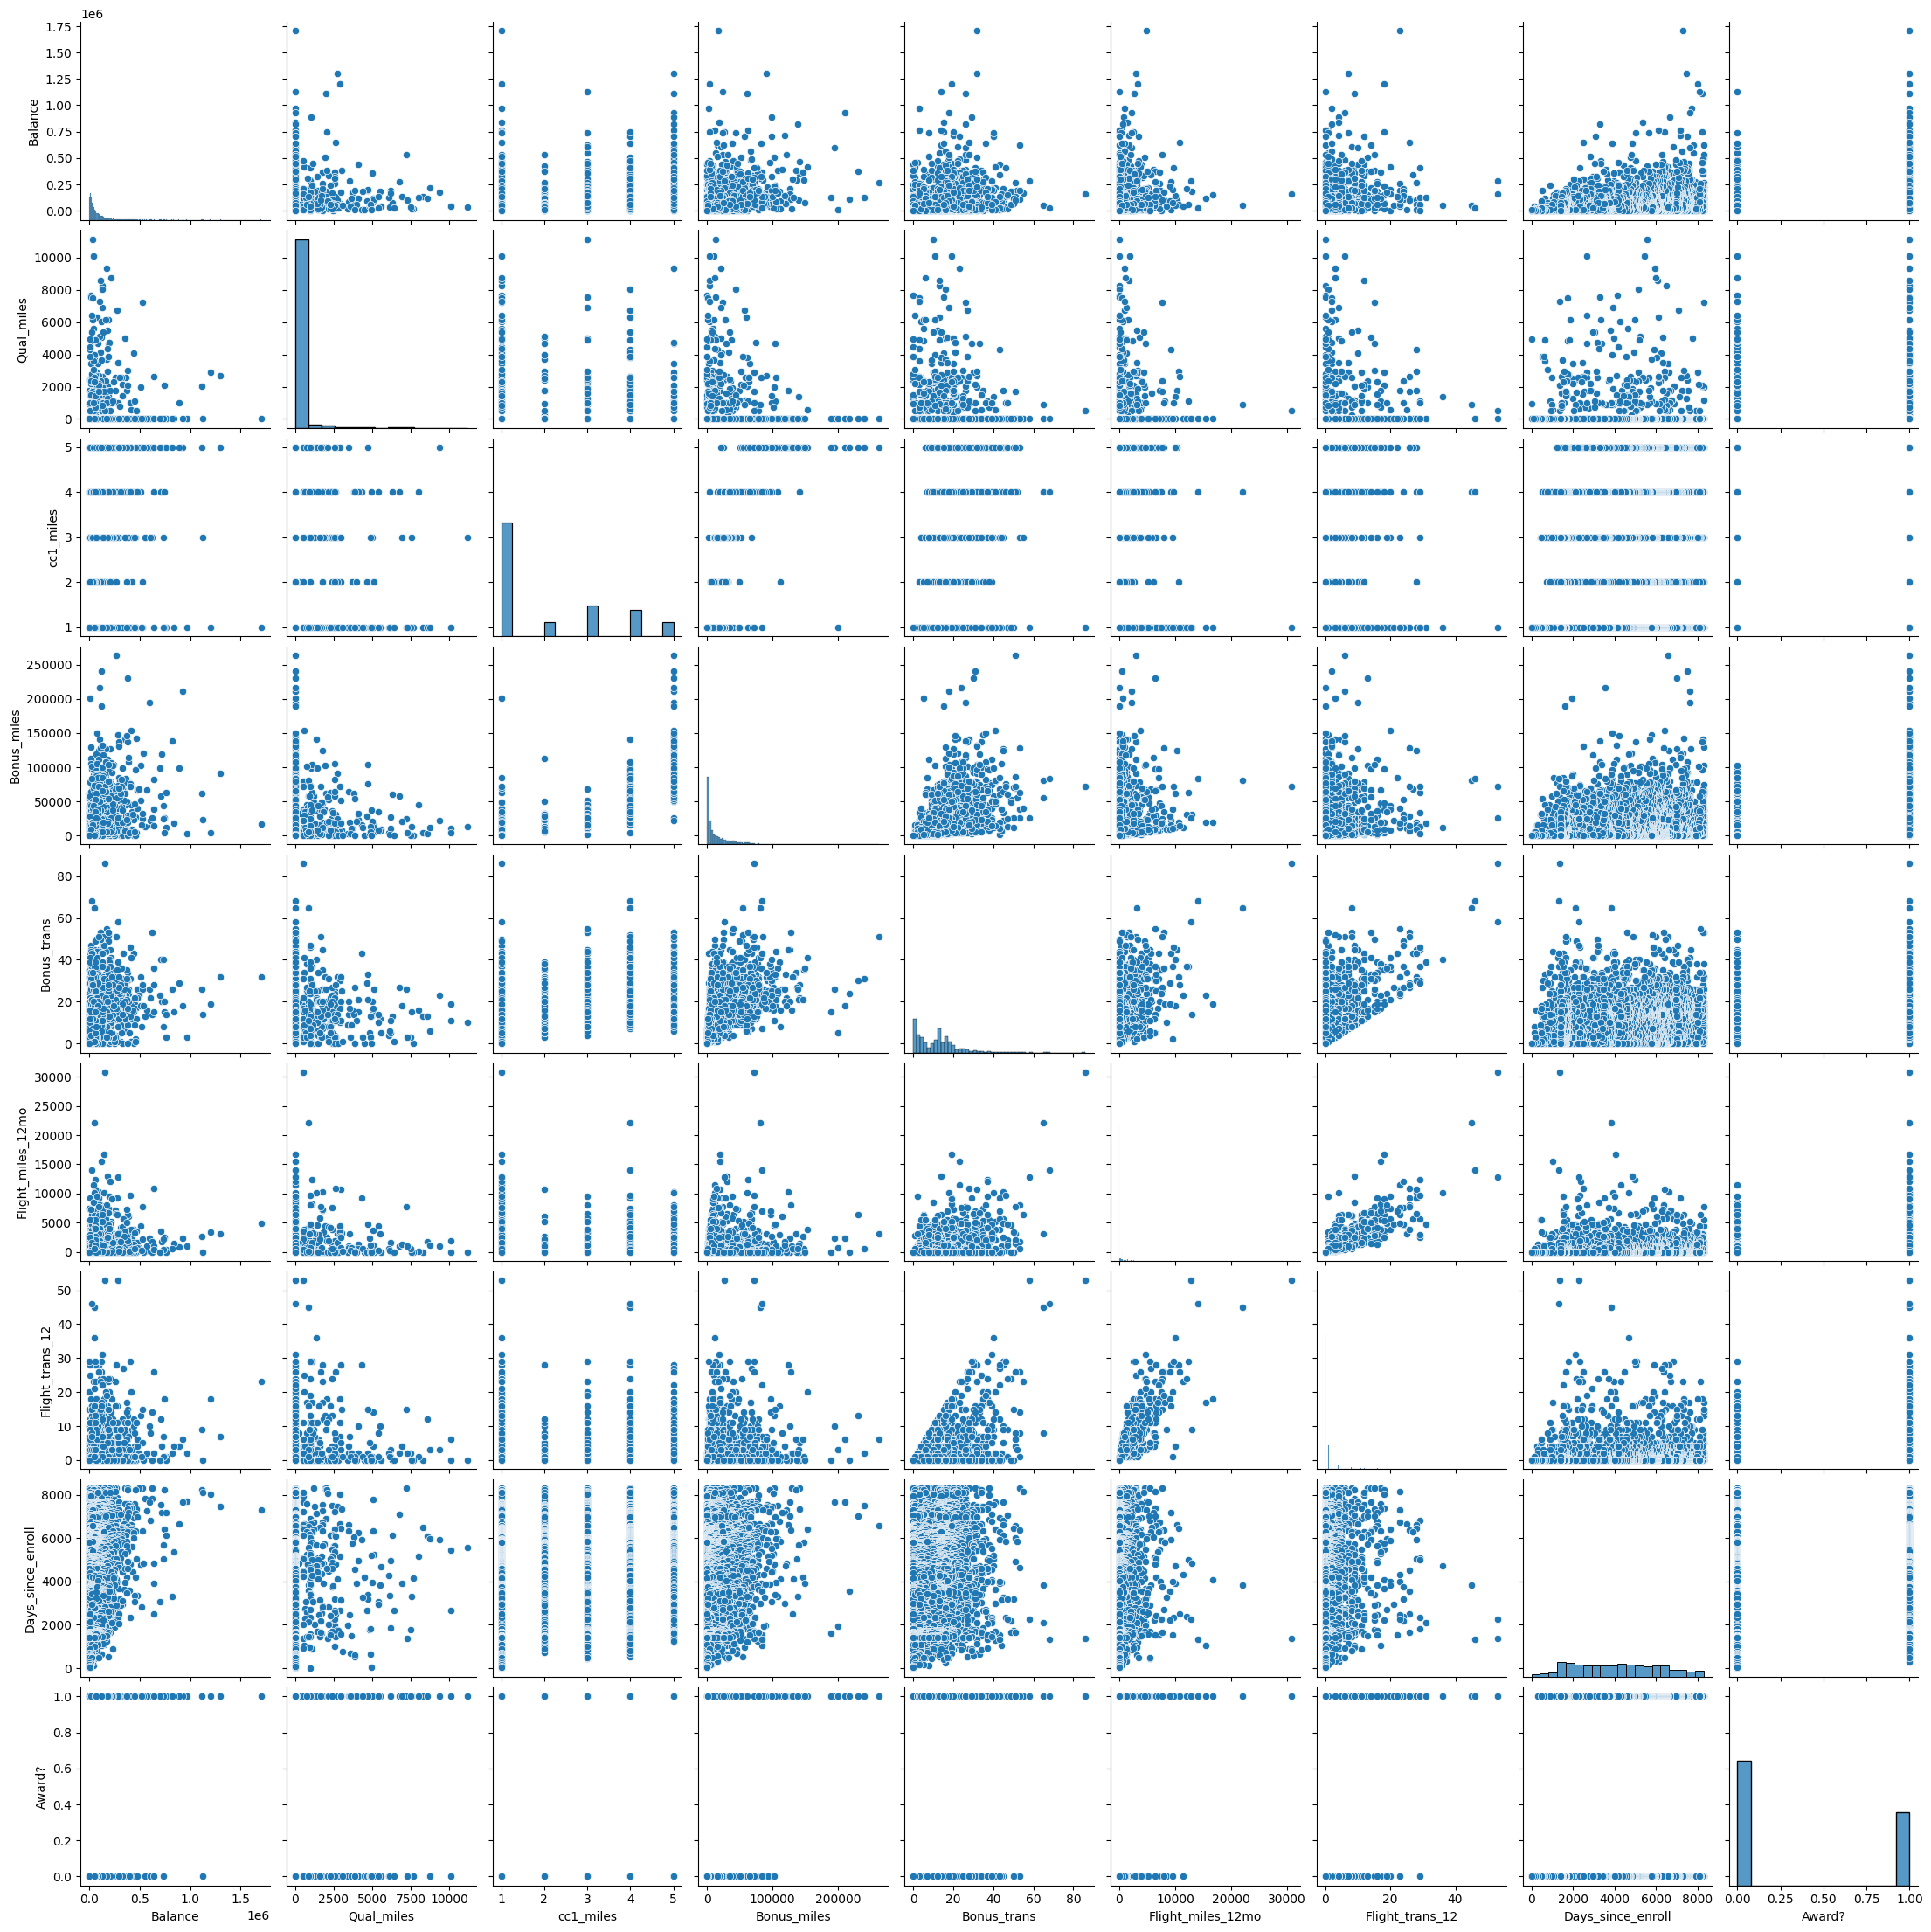

In [58]:
# scatterplots
sns.pairplot(df)

<Axes: >

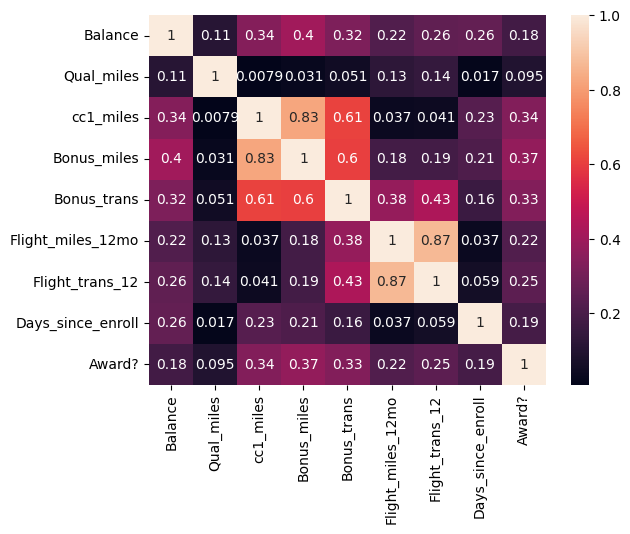

In [59]:
# heatmap
sns.heatmap(df.corr(), annot=True)

In [60]:
# df.isnull().sum()
# no null values

# not handling outliers
# because some imp features
# are eliminating by doing so.


# def handle_outliers(df,column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
#     df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
#     return df

In [61]:
# applying handle_outliers
# for column in df.columns:
#     handle_outliers(df,column)

In [62]:
# removing highly related column - Flight_trans_12
df.drop('Flight_trans_12', axis=1, inplace=True)

In [63]:
# scaling features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,Balance,Qual_miles,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.000660,0.011628,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.000815,0.023256,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.015636,0.046512,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.001896,0.011628,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.164211,0.302326,0.067398,0.835905,1.0


## K-Means

### Implementing Clustering Algorithm

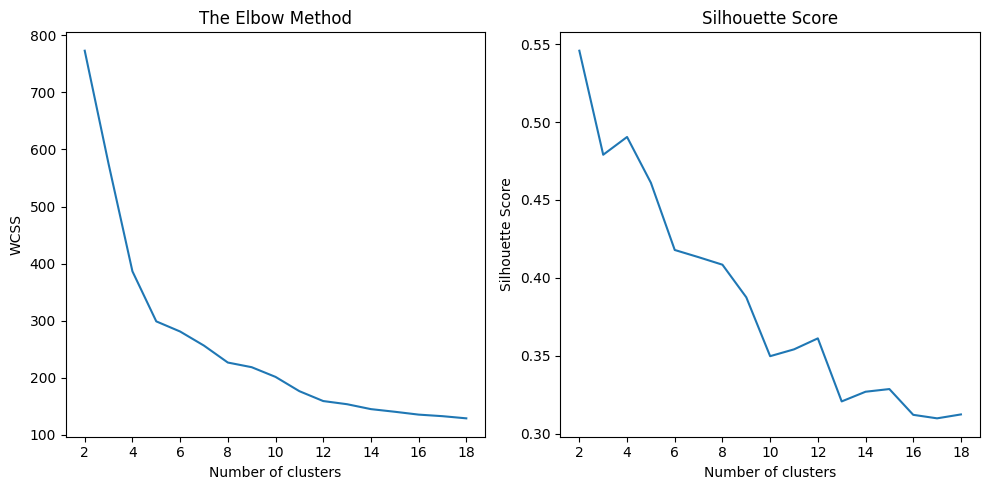

In [69]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

silhouette_scores = []
wcss = []
for i in range(2,19):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Elbow Method Plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2,19), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(range(2,19), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

### Cluster Analysis & Interpretation



*   KMeans is best fit at K value of 4, As graphs suggest variance is considerably minimun at K=4, and silhouette score is near to 0.5.


### Visualizations

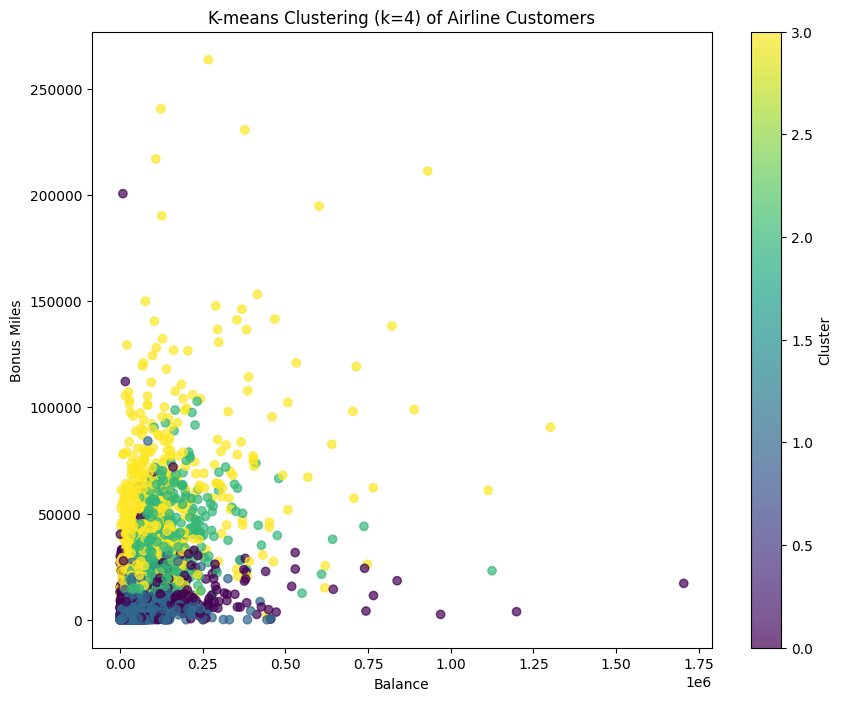

In [72]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['Balance'], df['Bonus_miles'], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Balance')
plt.ylabel('Bonus Miles')
plt.title('K-means Clustering (k=4) of Airline Customers')
plt.show()

## Hierarchical Clustering

### Implementing clustering Algorithm

Hierarchical Clustering (ward linkage):
Number of clusters: 4
Silhouette Score: 0.4454

Hierarchical Clustering (complete linkage):
Number of clusters: 4
Silhouette Score: 0.4894

Hierarchical Clustering (average linkage):
Number of clusters: 4
Silhouette Score: 0.5011



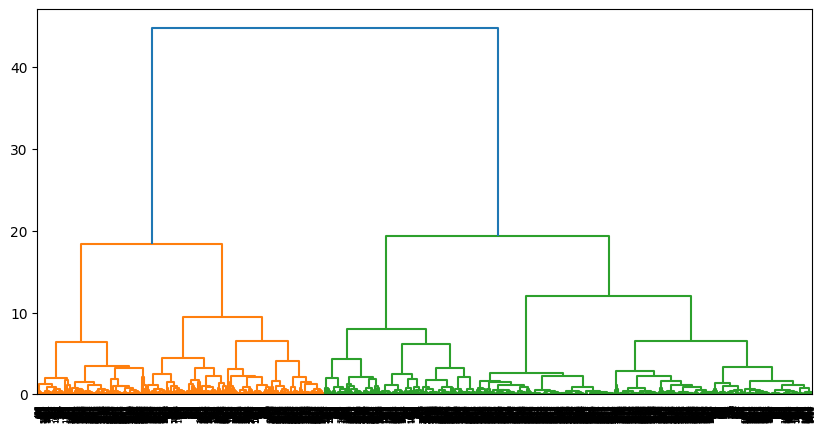

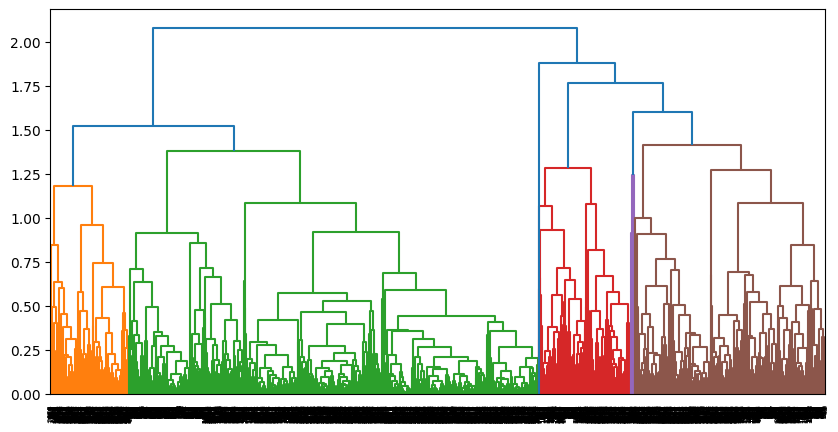

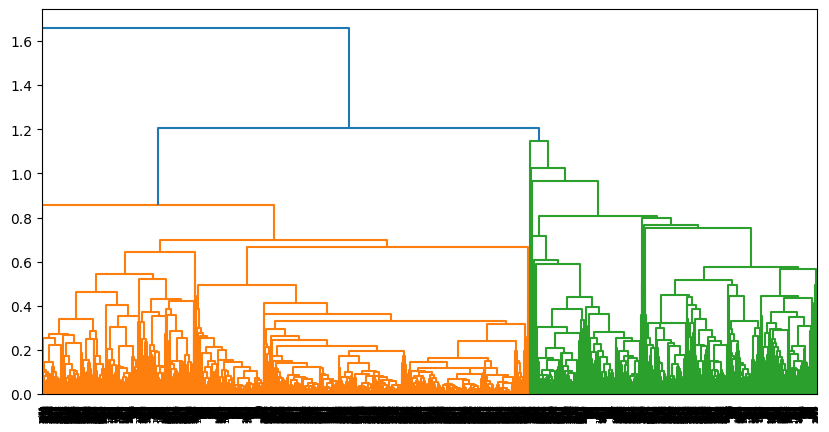

In [77]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Define linkage methods to test
linkage_methods = ['ward', 'complete', 'average']
n_clusters = 4

# Performing hierarchical clustering with different linkage methods
for method in linkage_methods:
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
    cluster_labels = hierarchical.fit_predict(df_scaled)

    # Calculating silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)

    print(f"Hierarchical Clustering ({method} linkage):")
    print(f"Number of clusters: {n_clusters}")
    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print()

    # Plotting dendrogram
    plt.figure(figsize=(10, 5))
    dendrogram = sch.dendrogram(sch.linkage(df_scaled, method=method))
    plt

### Cluster Analysis & Interpretation


*   Tested above at n=5, values shilouette score at 5 are lesser.
At n=4, Shilouette score (Average linkage) > Shilouette score (Complete linkage) > Shilouette score (Ward linkage).



### Visualizations

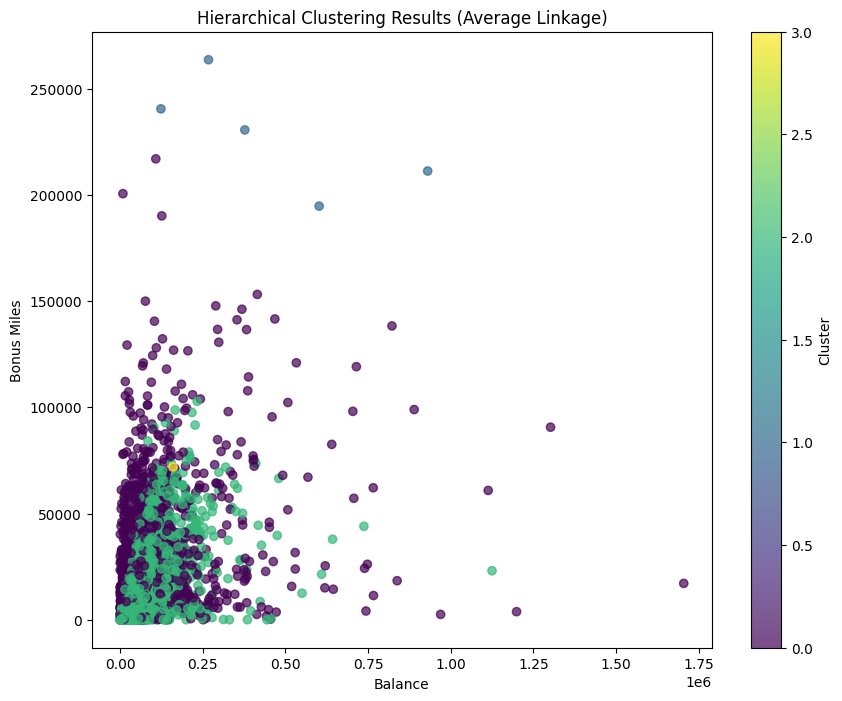

In [85]:
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='average')
cluster_labels = hierarchical.fit_predict(df_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['Balance'], df['Bonus_miles'], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Balance')
plt.ylabel('Bonus Miles')
plt.title('Hierarchical Clustering Results (Average Linkage)')
plt.show()

## DBSCAN

### Implementing Clustering Algorithm

In [80]:
from sklearn.cluster import DBSCAN

# Define range for epsilon
eps_range = np.arange(0.1, 2.1, 0.1)
min_samples = 19  # Fixed value for minPts

results = []

for eps in eps_range:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(df_scaled)

    # Calculating silhouette score if there's more than one cluster
    if len(set(labels)) > 1 and -1 not in labels:
        score = silhouette_score(df_scaled, labels)
        n_clusters = len(set(labels))
        results.append((eps, score, n_clusters))

# Convert results to numpy array for easier manipulation
results = np.array(results)

# Find the best epsilon
best_idx = results[:, 1].argmax()
best_eps, best_score, best_n_clusters = results[best_idx]

print(f"Best epsilon: {best_eps:.2f}")
print(f"Best silhouette score: {best_score:.4f}")
print(f"Number of clusters: {best_n_clusters:.0f}")

Best epsilon: 0.80
Best silhouette score: 0.5459
Number of clusters: 2


### Cluster Analysis & Interpretation
Cluster is scoring best silhouette score at radius of 0.80 (taking minpts = 19) and number of clusters forming are 2.

### Visualizations

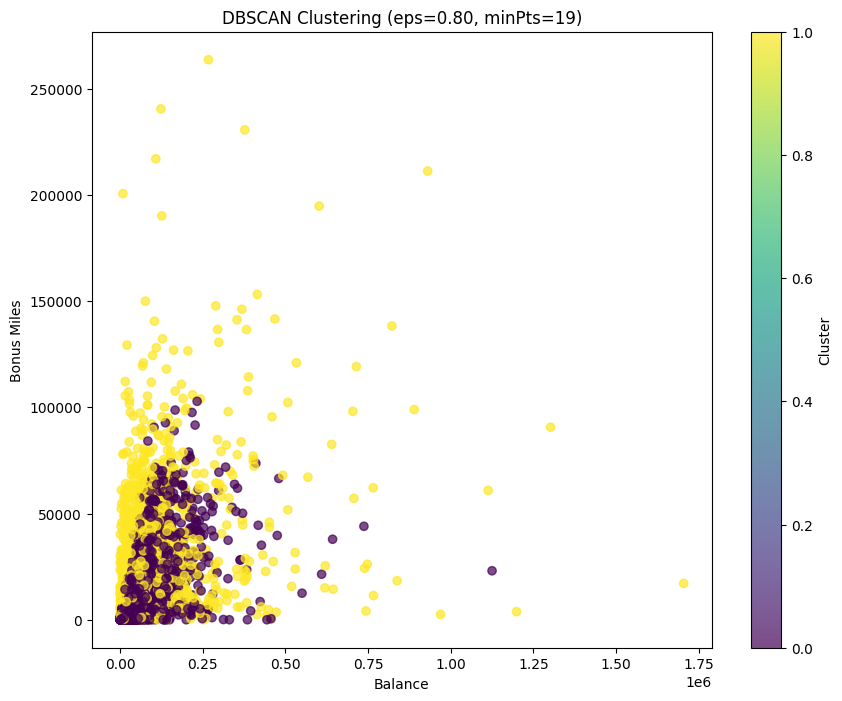

In [83]:
dbscan = DBSCAN(eps=0.80, min_samples=19)
labels = dbscan.fit_predict(df_scaled)

# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['Balance'], df['Bonus_miles'], c=labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Balance')
plt.ylabel('Bonus Miles')
plt.title('DBSCAN Clustering (eps=0.80, minPts=19)')
plt.show()